In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import h5py
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import random

In [2]:
f=h5py.File(r'features_database_gait_two_cycles_both_legs.h5', 'r')
print(list(f.keys()))
x = f['left'][:,:,:]
print('(samples, timesteps, features)', x.shape)

['left', 'right']
(samples, timesteps, features) (26, 276, 7)


In [31]:
path = f'cut_one_gait_two_cycle_left'
filelist =[]
digits =[]
digits_int =[]
for file in glob.glob(f'{path}\\*.c3d',recursive = True):
    filelist.append(file[4:-4].replace("_", ""))
    digits.append(file[28:-9])

for ele in digits:
    digits_int.append(1) if ele=='degeneration' else digits_int.append(0)

In [47]:
digits

['degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'degeneration',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy']

In [48]:
nsamples, nx, ny = x.shape
d2_x = x.reshape((nsamples,nx*ny))

In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(d2_x)
scaled_data

array([[-1.22267435,  0.05630691, -0.5715779 , ..., -0.89653304,
         0.42794146, -0.66281856],
       [-1.90840876,  1.58146286, -0.80308318, ..., -3.1474704 ,
         1.50433924, -0.33194932],
       [-0.35911177,  0.56277204, -1.08919772, ..., -1.13858822,
        -1.04997721,  1.04939722],
       ...,
       [ 0.31472414, -0.92402367, -0.48923583, ...,  0.14859258,
         0.58714367, -0.84544729],
       [ 1.23243316, -0.7999598 , -0.89885525, ...,  0.84641101,
        -1.68199852,  1.78105282],
       [ 1.23243316, -0.7999598 , -0.89885525, ...,  0.84641101,
        -1.68199852,  1.78105282]])

In [34]:
from sklearn.model_selection import train_test_split 


In [35]:
# sc = StandardScaler()   
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test) 

In [36]:
# mean_vec=np.mean(X_train,axis=0)
# cov_mat=(X_train-mean_vec).T.dot((X_train-mean_vec))/(X_train.shape[0]-1)
# mean_vect=np.mean(X_test,axis=0)
# cov_matt=(X_test-mean_vec).T.dot((X_test-mean_vec))/(X_test.shape[0]-1)
# print(cov_mat)

In [37]:
# cov_mat=np.cov(X_train.T)
# eig_vals,eig_vecs=np.linalg.eig(cov_mat)
# cov_matt=np.cov(X_test.T)
# eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [38]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=scaled_data.shape[0], svd_solver='full')
X_pca = pca.fit_transform(scaled_data) 
# X_test = pca.transform(X_test) 
# X_train.shape

In [39]:
# from sklearn.tree import DecisionTreeClassifier

# X_train, X_test, y_train, y_test = train_test_split(X_pca, digits_int, test_size = 0.2, random_state = 0) 
# clf = DecisionTreeClassifier()
# clf = clf.fit(X_train,y_train)
# y_pred_test = clf.predict(X_test)
# y_pred_train = clf.predict(X_train)

In [40]:
# plt.figure(figsize=(15,15))
# plt.scatter(X_train[:,0],X_train[:,1], c='blue', label='Train Data')
# for x,y,z in zip(X_train[:,0],X_train[:,1], y_pred_train):
#     label = f"({z})"
#     plt.annotate(label, 
#                  (x,y), 
#                  textcoords="offset points", 
#                  xytext=(0,10),
#                  ha='center')
# plt.scatter(X_test[:,0],X_test[:,1], c='red', label='Train Data')
# for x,y,z in zip(X_test[:,0],X_test[:,1], y_pred_test):
#     label = f"({z})"
#     plt.annotate(label, 
#                  (x,y), 
#                  textcoords="offset points", 
#                  xytext=(0,10),
#                  ha='center')
    
# plt.xlabel('First principal component')
# plt.ylabel('Second Principal Component')
# plt.title('Prediction of Data Train and Test')
# plt.legend()

In [41]:
# from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
# train_f1 = []
# test_f1 = []

# for i in range(8):
    
#     X = scaled_data[:,0:i+1]
    
#     # Train-test-split
#     X_train, X_test, y_train, y_test = train_test_split(X, digits_int,
#                                                         test_size=0.25,
#                                                         random_state=42)

#     # Perform feature scaling
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)

#     # Fit k-NN classifier and make predictions
#     dtc = DecisionTreeClassifier()
#     dtc.fit(X_train, y_train)
#     y_pred_train = dtc.predict(X_train)
#     y_pred_test = dtc.predict(X_test)
#     train_f1.append(f1_score(y_train, y_pred_train))
#     test_f1.append(f1_score(y_test, y_pred_test))

# # Plot accuracy by n_neighbors
# plt.figure(figsize=(8, 6))
# plt.plot(range(1,9), train_f1, label='Train f1 Score')
# plt.plot(range(1,9), test_f1, label='Test f1 Score')
# plt.ylabel('f1 Score')
# plt.xlabel('# of Principal Components')
# plt.legend()
# plt.show()

In [42]:
# X = scaled_data[:,0:26]
    
# # Train-test-split
# X_train, X_test, y_train, y_test = train_test_split(X, digits_int,
#                                                     test_size=0.25,
#                                                     random_state=42)

# # Perform feature scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# dtc = DecisionTreeClassifier()
# dtc.fit(X_train, y_train)
# y_pred_train = dtc.predict(X_train)
# y_pred_test = dtc.predict(X_test)
    
# print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
# print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
# print(classification_report(y_test, y_pred_test))

In [43]:
# plot_confusion_matrix(dtc, X_test, y_test, display_labels=['healthy','degeneration'],
#                       normalize='true', cmap='Blues');

In [53]:
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
X = X_pca[:,0:26]
    
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, digits_int,
                                                    test_size=0.25,
                                                    random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit DT classifier and make predictions
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)
    
print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))


Train f1 Score: 1.0
Test f1 Score: 0.0
              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       0.00      0.00      0.00         5

    accuracy                           0.29         7
   macro avg       0.14      0.50      0.22         7
weighted avg       0.08      0.29      0.13         7



C:\Users\alekk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: index 27 is out of bounds for axis 1 with size 26

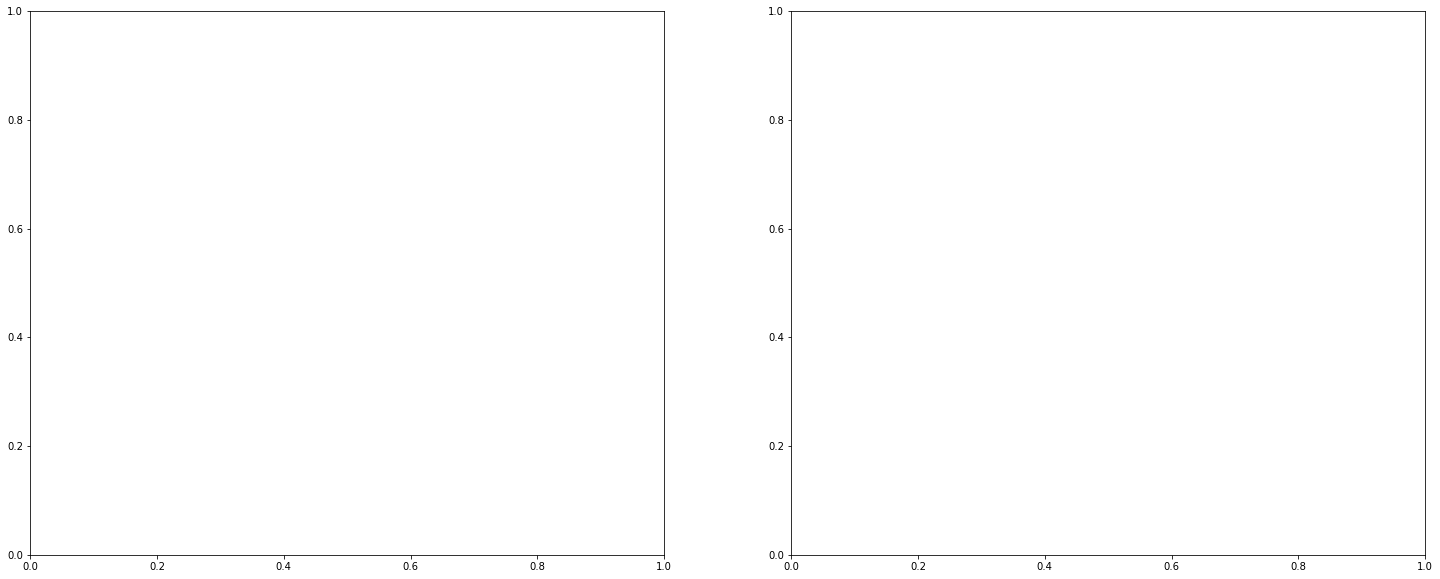

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

#DT and PCA

ax[0].scatter(X_train[:,2],X_train[:,27], c='blue', label='Train Data')
for x,y,z in zip(X_train[:,2],X_train[:,27], y_pred_train):
    label = f"({z})"
    ax[0].annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')

ax[0].scatter(X_test[:,2],X_test[:,27], c='red', label='Test Data')
for x,y,z in zip(X_test[:,2],X_test[:,27], y_pred_test):
    label = f"({z})"
    ax[0].annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
    
ax[0].set_xlabel('Second principal component')
ax[0].set_ylabel('Twenty-seventh Principal Component')
ax[0].legend()

#Only PCA
ax[1].plot(X_pca[0:41,2],X_pca[0:41,27], 'x', markersize=7, color='blue', alpha=0.5, label='degeneration')
ax[1].plot(X_pca[41:76,2],X_pca[41:76,27], 'o', markersize=7, color='red', alpha=0.5, label='healthy')
ax[1].legend()
ax[1].set_xlabel('Second principal component')
ax[1].set_ylabel('Twenty-seventh Principal Component')